In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Loading dataset

In [3]:
file_path = 'C:/Users/pc/PycharmProjects/Week 04 Project 02/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [4]:
#Displaying some first few rows of the dataset

In [5]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
# Define preprocessing function

In [7]:
max_features = 10000  # Number of unique words
max_length = 200      # Maximum length of sequences

In [8]:
def preprocess_data(df):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(df['review'])
    sequences = tokenizer.texts_to_sequences(df['review'])
    X = pad_sequences(sequences, maxlen=max_length)
    y = pd.get_dummies(df['sentiment']).values  # One-hot encoding
    return X, y

In [9]:
# Preprocess the data

In [10]:
X, y = preprocess_data(df)

In [11]:
## Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Building the model

In [24]:
hybrid_model = Sequential()
hybrid_model.add(Embedding(input_dim=max_features, output_dim=128))
hybrid_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
hybrid_model.add(MaxPooling1D(pool_size=4))
hybrid_model.add(SimpleRNN(64))
hybrid_model.add(Dropout(0.5))
hybrid_model.add(Dense(2, activation='softmax'))
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model

In [26]:
history_hybrid = hybrid_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.6701 - loss: 0.5565 - val_accuracy: 0.8793 - val_loss: 0.2945
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9198 - loss: 0.2168 - val_accuracy: 0.8873 - val_loss: 0.2798
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9621 - loss: 0.1127 - val_accuracy: 0.8892 - val_loss: 0.3198
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9848 - loss: 0.0464 - val_accuracy: 0.8714 - val_loss: 0.3961
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.9893 - loss: 0.0306 - val_accuracy: 0.8650 - val_loss: 0.5258


In [27]:
#Evaluating the model

In [28]:
train_loss, train_acc = hybrid_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = hybrid_model.evaluate(X_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')

Train Accuracy: 0.9869999885559082, Test Accuracy: 0.8650000095367432


In [29]:
# Plot training history

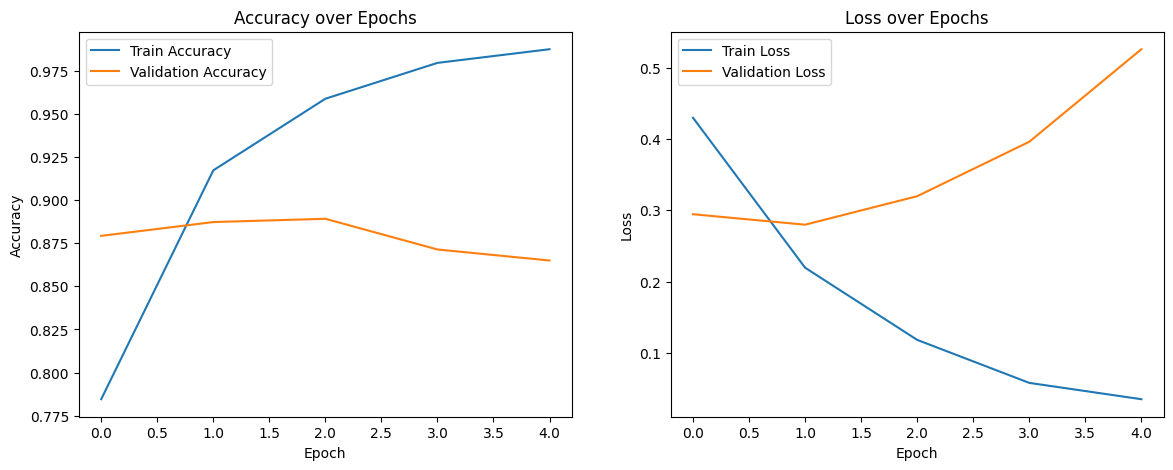

In [30]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_hybrid.history['accuracy'], label='Train Accuracy')
plt.plot(history_hybrid.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_hybrid.history['loss'], label='Train Loss')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()